#ADVERTISING DATA SET ANALYSIS

##Step One Set Up Packages

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [237]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20B/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [238]:
print(ad_data.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


In [239]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [240]:
ad_data.tail(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
990,35.79,44,33813.08,165.62,Enterprise-wide tangible model,North Katie,1,Tonga,2016-04-20 13:36:42,1
991,38.96,38,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,2016-07-21 16:02:40,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,2016-03-06 11:36:06,1
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,2016-02-11 23:45:01,0
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [241]:
ad_data.shape

(1000, 10)

##EDA

I am going to check if we have missing values, using techinique from past lectures. Notice that we have no missing values after I executed the code. I do not have to worry about missing data.

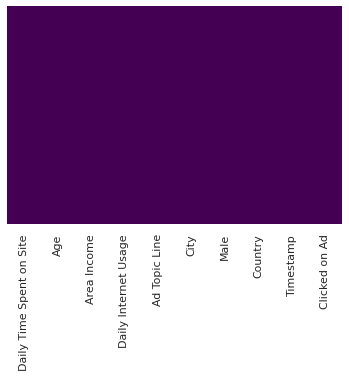

In [242]:
sns.heatmap(ad_data.isnull(),yticklabels=False, cbar = False, cmap ='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


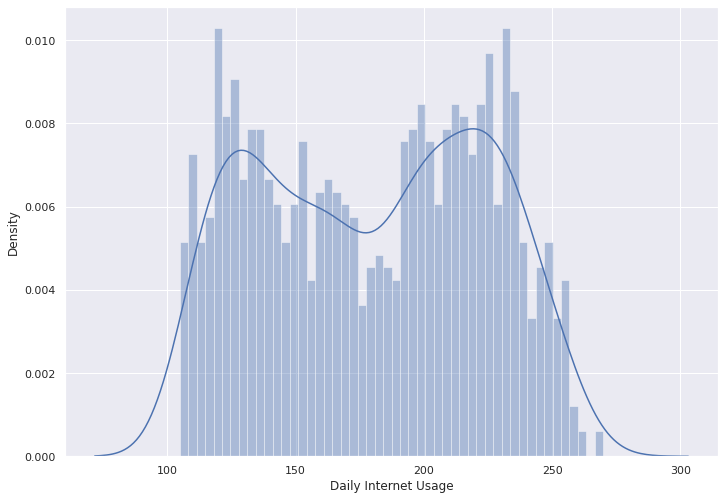

In [243]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ad_data['Daily Internet Usage'], bins=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


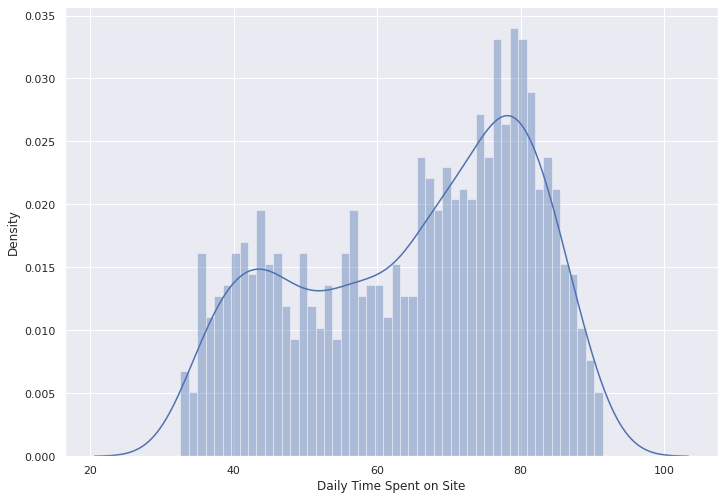

In [244]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ad_data['Daily Time Spent on Site'], bins=50)
plt.show()

I going to analyze a few averages to determine a basic profile of the users. I want to get a better idea of the average age of the user, the average daily time spent of site, and the median income for each country. 

In [245]:
Avg_age = round(ad_data['Age'].mean())

In [246]:
Avg_time_Spent = round(ad_data['Daily Time Spent on Site'].mean())

In [247]:
Median_Inc = round(ad_data['Area Income'].median())

In [248]:
print('We have ' + str(Avg_age) +  ' years as the average age of each user')
print('We have ' + str(Avg_time_Spent) + ' as the average daily time each user spend a site')
print('The median income for each income area is ' + str(Median_Inc))

We have 36 years as the average age of each user
We have 65 as the average daily time each user spend a site
The median income for each income area is 57012


I also want to count the number of yes clicks and no clicks before coming up with a model that predicts whehter or not someone will click based on age, income, and time spent on a site.

In [249]:
Clicks = ad_data['Clicked on Ad']
click = 0
for cli in Clicks:
  if cli ==0:
    click += 1
No_clicks = click


In [250]:
print('We have ' + str(No_clicks) + ' people that did not click on the advertisment')


We have 500 people that did not click on the advertisment


In [251]:
Clicks = ad_data['Clicked on Ad']
click = 0
for cli in Clicks:
  if cli ==1:
    click += 1
Yes_clicks = click

In [252]:
print('We have ' + str(Yes_clicks) + ' people who click on the advertisment') 

We have 500 people who click on the advertisment


Notice that half of the users click on the advertisment and and the other half did not click on the advertisment.

In [253]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

We are going to drop 'Daily Internet Usage', 'City', 'Male', 'Country', and 'Timestamp' to focus more on 'Daily Time Spent on Site, 'Area Income' and 'Age' on my model.

In [254]:
Internet = pd.get_dummies(ad_data['Daily Internet Usage'],drop_first=True)

In [255]:
Male = pd.get_dummies(ad_data['Male'],drop_first=True)

In [256]:
ad_data.drop([ 'Daily Internet Usage','Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp'], axis=1, inplace=True)

In [257]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Clicked on Ad
0,68.95,35,61833.90,0
1,80.23,31,68441.85,0
2,69.47,26,59785.94,0
3,74.15,29,54806.18,0
4,68.37,35,73889.99,0
...,...,...,...,...
995,72.97,30,71384.57,1
996,51.30,45,67782.17,1
997,51.63,51,42415.72,1
998,55.55,19,41920.79,0


In [258]:
from sklearn.model_selection import train_test_split

In [272]:
X_train, X_test, Y_train, Y_test = train_test_split(ad_data.drop('Clicked on Ad', axis=1), ad_data['Clicked on Ad'], test_size=0.30,
                                                    random_state = 101)

In [273]:
from sklearn.linear_model import LogisticRegression

In [266]:
logmodel = LogisticRegression()


In [274]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [275]:
predictions = logmodel.predict(X_test)

##EVALUATION

In [276]:
from sklearn.metrics import classification_report

In [277]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       157
           1       0.94      0.92      0.93       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

